In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats, scipy.special

# Дано:

In [16]:
years = 9
k1 = 1.8
k2 = 1.24
k3 = 1.15
k4 = k1

one_year = 3.154*10**7
tau_r = years * one_year

# Списки вероятностей безотказной работы объединенные по закону распределения
p_exp = np.array([0.981, 0.991, 0.994, 0.976, 0.996])
p_norm = np.array([0.978])
p_l_norm = np.array([0.964])

# Решение:

Введём некоторые функции для поиска параметров случайных распределений. Они дублируют решение выполненное в MathCad и нужны для избежания потери точности рассчетов и для векторизации вычислений.

In [17]:
# Функция поиска параметра lambda, эксп. закона распределения:
def find_lamb_exp(p_i):
    return (-1/tau_r)*(np.log(p_i))

# Функция поиска времени безотказной работы эксп. закона распределения:
def norm_exp(x_i, lamb_i):
    return (-1/lamb_i)*np.log(x_i)

# Функция поиска параметра sigma, норм. закона распределения:
def find_sig_norm(p_i, k):
    return (tau_r - k*tau_r)/(scipy.special.ndtri(1-p_i))

# Функция поиска времени безотказной работы норм. закона распределения:
def norm(x_i, sig_i, k):
    return (scipy.special.ndtri(1-x_i))*sig_i + k*tau_r

# Найдем параметр sigma(zi) в MathCad и вычислим остальные параметры для логнормального распределения P4i:
sig_zi = 0.30145307552088571247
m_zi = np.log(k1*tau_r)-(sig_zi ** 2 / 2)
sig_ti = ((np.exp(sig_zi ** 2) - 1) * np.exp(2 * m_zi + sig_zi ** 2)) ** (1 / 2)

# Функция поиска времени безотказной работы логнормального закона распределения:
def log_norm(x_i):
    return np.exp(scipy.special.ndtri(1-x_i)*sig_zi + m_zi)

Проверим функции.

In [18]:
lamb_exp = find_lamb_exp(p_exp)
# print(lamb_exp)
print('Выполним проверку функций', end='\n\n')
print('Эксп. закон: Ti при Xi=Pi (Должно быть равно tau_r)', norm_exp(p_exp, lamb_exp), end='\n\n')

print('Норм. закон: Ti при Xi=Pi=0.978 (Должно быть равно tau_r)', norm(p_norm, find_sig_norm(p_norm, k1), k1), end='\n\n')

print('Лог.норм. закон: Ti при Xi=Pi=0.964 (Должно быть равно tau_r)', log_norm(p_l_norm), end='\n\n')

print('tau_r =', tau_r)

Выполним проверку функций

Эксп. закон: Ti при Xi=Pi (Должно быть равно tau_r) [2.8386e+08 2.8386e+08 2.8386e+08 2.8386e+08 2.8386e+08]

Норм. закон: Ti при Xi=Pi=0.978 (Должно быть равно tau_r) [2.8386e+08]

Лог.норм. закон: Ti при Xi=Pi=0.964 (Должно быть равно tau_r) [2.8386e+08]

tau_r = 283860000.0


# Генерация

Используя стандартный равномерный генератор псевдослучайных чисел, сгенерируем матрицу (22$*$n) для использования в дальнейших рассчетах. Генератор имеет период $2^{128}$.

Можно заметить, что распределение случайных величин равномерно в промежутке [0:1] для каждого элемента.
А значит генератор удовлетворяет требованиям.


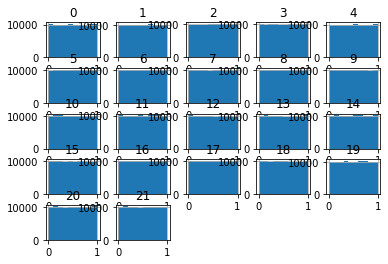

In [19]:
# Зададим количество итераций:
n = 100000

# Альтернативный генератор
def random_gen(n, m):
    random_number = np.random.uniform(0, 2, (n, m*3))
    return random_number[random_number<=1][:m*n].reshape(n, m)

# Инициализация генератора
rg = np.random.default_rng()
# Генерация 22 рядов по n итераций случайных величин равномерно распределенных в промежутке [0,1]
j = rg.random((22, n))
# j = random_gen(22, n) # альтернативный генератор

# Создадим списки вероятностей безотк.раб. для элементов подгрупп:
p_1 = np.array([0.978])
p_2 = np.array([0.981, 0.981, 0.981, 0.991, 0.994])
p_3 = np.array([0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.996, 0.996, 0.996])
p_4 = np.array([0.964, 0.964, 0.964])
J_test = pd.DataFrame(j.T)
J_test.hist()
print('Можно заметить, что распределение случайных величин равномерно в промежутке [0:1] \
для каждого элемента.\nА значит генератор удовлетворяет требованиям.')


Определим время безотказной работы элементов 1-й подсистемы для всех итераций:

Элемент #1.1: 0.97788

Рассмотрим график распределения для проверки его на "нормальность": 


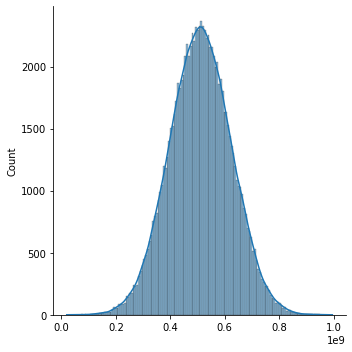

In [20]:
lamb_1 = find_sig_norm(p_1, k1)
pods_1 = norm(j[0,:], lamb_1, k1)

# Проверка на соответствие заданной вероятности безотказной работы:
print('Элемент #1.1:', (pods_1>tau_r).mean())
print('\nРассмотрим график распределения для проверки его \
на "нормальность":','\n', sns.displot(pods_1, kde=True))


Определим время безотказной работы элементов 2-й подсистемы для всех итераций:

Элемент #2.1: 0.98057
Элемент #2.2: 0.98145
Элемент #2.3: 0.98038
Элемент #2.4: 0.99068
Элемент #2.5: 0.99365

Рассмотрим график одного из распределений для проверки на "эксп. нормальность": 


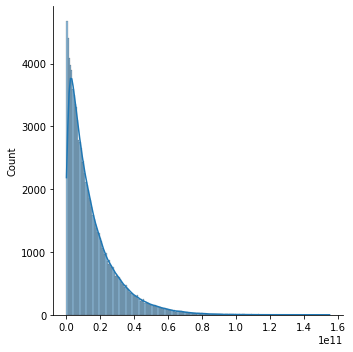

In [21]:
lamb_2 = find_lamb_exp(p_2)
pods_2 = np.empty((lamb_2.shape[0], (j.shape[1])))

for k in range(p_2.shape[0]):
      pods_2[k] = norm_exp(j[1+k,:], lamb_2[k])[np.newaxis, :]

# Проверка на соответствие заданной вероятности безотказной работы:
for k in range(pods_2.shape[0]):
    print(f'Элемент #2.{k+1}:', (pods_2[k]>tau_r).mean())

print('\nРассмотрим график одного из распределений для проверки \
на "эксп. нормальность":','\n', sns.displot(pods_2[0], kde=True))

# Введём ограничение на максимальное время работы элементов (выполняется после отрисовки графика):
np.place(pods_2[:3], (pods_2[:3]>tau_r*k2), tau_r*k2)


Определим время безотказной работы элементов 3-й подсистемы для всех итераций:

Элемент #3.1: 0.97602
Элемент #3.2: 0.97587
Элемент #3.3: 0.97668
Элемент #3.4: 0.9754
Элемент #3.5: 0.9761
Элемент #3.6: 0.97566
Элемент #3.7: 0.97587
Элемент #3.8: 0.97547
Элемент #3.9: 0.97549
Элемент #3.10: 0.97628
Элемент #3.11: 0.99615
Элемент #3.12: 0.99626
Элемент #3.13: 0.0

Рассмотрим график одной из величин для проверки распределения на "эксп. нормальность": 


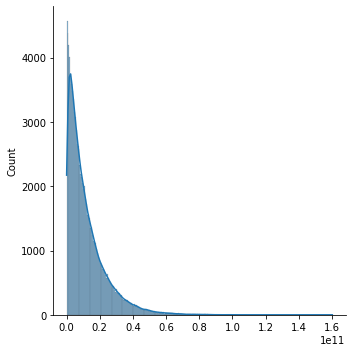

In [22]:
lamb_3 = find_lamb_exp(p_3[:-1])
pods_3 = np.empty((p_3.shape[0], (j.shape[1])))

for k in range(p_3.shape[0]-1):
      pods_3[k] = norm_exp(j[6+k,:], lamb_3[k])[np.newaxis, :]
pods_3[-1] = j[18]

# Проверка на соответствие заданной вероятности безотказной работы:
for k in range(pods_3.shape[0]):
    print(f'Элемент #3.{k+1}:', (pods_3[k]>tau_r).mean())
    
print('\nРассмотрим график одной из величин для проверки распределения \
на "эксп. нормальность":','\n', sns.displot(pods_3[0], kde=True))

# Введём ограничение на максимальное время работы элементов (выполняется после отрисовки графика):
np.place(pods_3[:10], (pods_3[:10]>tau_r*k3), tau_r*k3)


Определим время безотказной работы элементов 4-й подсистемы для всех итераций:

Элемент #4.1: 0.9651
Элемент #4.2: 0.96333
Элемент #4.3: 0.96433

Рассмотрим график одной из величин для проверки распределения на "логнормальность": 


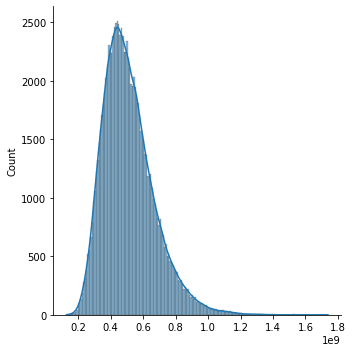

In [23]:
pods_4 = log_norm(j[-3:])
# Проверка на соответствие заданной вероятности безотказной работы:
for i in range(pods_4.shape[0]): print(f'Элемент #4.{i+1}:',(pods_4[i]>tau_r).mean())
    
print('\nРассмотрим график одной из величин для проверки распределения \
на "логнормальность":','\n', sns.displot(pods_4[0], kde=True))

Для наглядности сформируем таблицу сгенерированных значений для всех элементов системы (с введенным ограничением на максимальное время безотказной работы):

In [24]:
System = pd.DataFrame(np.concatenate((pods_1[np.newaxis], pods_2, pods_3, pods_4), axis=0))
System.rename(index={0: '1.1', 1: '2.1', 2: '2.2', 3: '2.3', 4: '2.3хр', 5: 'П1',
                     6: '3.1', 7: '3.2', 8: '3.3', 9: '3.4', 10: '3.5', 11: '3.6',
                     12: '3.7', 13: '3.8', 14: '3.9', 15: '3.10', 16: '3.9хр', 17: '3.10хр',
                     18: 'П2', 19: '4.1', 20: '4.2', 21: '4.3'}, inplace=True)

In [25]:
System

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
1.1,5.451357e+08,5.364825e+08,5.237276e+08,6.136972e+08,7.099078e+08,4.978385e+08,5.289856e+08,3.147171e+08,6.478049e+08,5.172752e+08,...,4.533341e+08,4.131493e+08,7.604211e+08,3.990583e+08,4.849622e+08,5.114356e+08,5.358396e+08,5.075522e+08,5.714159e+08,6.851647e+08
2.1,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,2.255715e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08
2.2,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08
2.3,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08
2.3хр,1.421220e+10,9.621719e+10,7.997089e+09,4.831572e+09,3.116261e+10,7.504330e+09,1.284536e+10,9.435184e+09,3.311256e+10,6.325911e+09,...,7.498934e+10,3.772900e+10,3.653290e+09,2.001600e+10,1.247214e+10,5.147654e+10,3.390058e+10,4.516842e+10,1.736439e+10,3.317613e+09
П1,2.503861e+10,1.025986e+11,7.611847e+09,8.718557e+09,5.021002e+10,2.781978e+10,2.622456e+10,1.017118e+11,6.648636e+10,1.291321e+09,...,6.747725e+10,1.056589e+11,7.041181e+09,1.275739e+11,8.293851e+09,3.798230e+10,3.834550e+09,1.025486e+10,3.487775e+10,1.198390e+10
3.1,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08
3.2,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08
3.3,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,1.295594e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08
3.4,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08


Вероятности безотказной работы элементов:

In [26]:
(System.T>=tau_r).mean()

1.1       0.97788
2.1       0.98057
2.2       0.98145
2.3       0.98038
2.3хр     0.99068
П1        0.99365
3.1       0.97602
3.2       0.97587
3.3       0.97668
3.4       0.97540
3.5       0.97610
3.6       0.97566
3.7       0.97587
3.8       0.97547
3.9       0.97549
3.10      0.97628
3.9хр     0.99615
3.10хр    0.99626
П2        0.00000
4.1       0.96510
4.2       0.96333
4.3       0.96433
dtype: float64

Отдельная проверка элемента П2:

In [27]:
(System.T['П2']<0.996).mean()

0.99611

# Переход к работе с алгоритмами.

По-возможности будут использоваться функции и методы библиотеки NumPy, дабы ускорить работу алгоритма (матричные операции много быстрее, в сравнении с простыми циклами).

Создание таблицы для занесения в неё времени работы элементов определяющих минимальное время безотказной работы подсистем 1-4 при j-й итерации:

In [28]:
T = pd.DataFrame(columns=['T1_j', 'T2_j', 'T3_j', 'T4_j'])
T.index.name = 'j'

Занесение в таблицу времени безотказной работы 1-й подсистемы:

In [29]:
T.T1_j = pods_1
# Предпросмотр таблицы минимального времени безотказной работы подсистем (первые 5 строк).
T.head()

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,5.451357e+08,NaN,NaN,NaN
1,5.364825e+08,NaN,NaN,NaN
2,5.237276e+08,NaN,NaN,NaN
3,6.136972e+08,NaN,NaN,NaN
4,7.099078e+08,NaN,NaN,NaN


Исполнение алгоритма по поиску времени безотказной работы 4-й подсистемы:

In [30]:
T.T4_j = np.fmax(np.fmin(pods_4[0], pods_4[1]), pods_4[2])
# Предпросмотр таблицы минимального времени безотказной работы подсистем (первые 5 строк).
T.head()

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,5.451357e+08,NaN,NaN,6.145543e+08
1,5.364825e+08,NaN,NaN,3.894717e+08
2,5.237276e+08,NaN,NaN,5.189189e+08
3,6.136972e+08,NaN,NaN,5.930043e+08
4,7.099078e+08,NaN,NaN,5.083188e+08


Исполнение алгоритма по поиску времени безотказной работы 2-й подсистемы:

In [31]:
# Объявляем вектор А, который удовлетворяет условию: A = MIN{t2.1_j, t2.2_j}:
A = np.amin(pods_2[:2], axis=0)

In [32]:
# Опишем правило выделения элементов из вектора А, которые: 
# 1) меньше tau_r; 
# 2) для своей итерации имеют t2.3хр_j, БОЛЬШИЙ чем соответствующий элемент из списка А. 

cond_1 = (A < tau_r) & (pods_2[3] >= A)

In [33]:
# Введём условия для определения (t2.3_j >= tП1_j), и объединим с предыдущим условием.
A_plus_tP = pods_2[2] >= pods_2[4]
A_plus_t23 = np.logical_not(A_plus_tP)

A_plus_t23 = cond_1 & A_plus_t23
A_plus_tP = cond_1 & A_plus_tP

In [34]:
# Используем принятые правила как маску для манипуляций с элементами вектора А:
np.place(A, A_plus_t23, (A[A_plus_t23]+pods_2[2][A_plus_t23]))
np.place(A, A_plus_tP, (A[A_plus_tP]+pods_2[4][A_plus_tP]))

In [35]:
# Внесём вектор времени безотказной работы второй подсистемы в таблицу. И выведем первые 5 строк из таблицы.
T.T2_j = A
(A>tau_r).mean()

0.99913

In [36]:
v = np.array(pods_2)
r = np.amin(v[:2], axis=0)
v = v.T

for i in range(r.shape[0]):
    if r[i] < tau_r:
        if v[i][3] >= r[i]:
            if v[i][2] >= v[i][4]:
                r[i] = r[i] + v[i][4]
            else:
                r[i] = r[i] + v[i][2]
                

# T.T2_j = r
(r>tau_r).mean()

0.99913

In [37]:
# Предпросмотр таблицы минимального времени безотказной работы подсистем (первые 5 строк).
T.head()

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,5.451357e+08,351986400.0,NaN,6.145543e+08
1,5.364825e+08,351986400.0,NaN,3.894717e+08
2,5.237276e+08,351986400.0,NaN,5.189189e+08
3,6.136972e+08,351986400.0,NaN,5.930043e+08
4,7.099078e+08,351986400.0,NaN,5.083188e+08


Исполнение алгоритма по поиску времени безотказной работы 3-й подсистемы:

In [38]:
# Данная ячейка несёт в себе отладочные данные использованные во время написания алгоритма.

# pods_3t = np.array(pods_3.T[:2])
# pods_3t[1][2] = 3.26439000e+07
# pods_3t[1][1] = 1
# pods_3t[1][3] = 1
# pods_3t[1]

In [39]:
# Соберём дополнительную таблицу(матрицу) запасных элементов и их времен хранения, транспонируем матрицу для удобства:
zapas = np.array(pods_3[8:12])
zapas = zapas.T

x = np.array(pods_3.T)

# Реализация алгоритма для поиска минимального времени работы подсистемы 3 по соответствующей блок-схеме:

for i in range(x.shape[0]):
    if x[i][:8].min() < tau_r:
        if x[i][12] < p_3[12]:
            if x[i][:8].min() < zapas[i][2]:
                x[i][x[i][:8].argmin()] = x[i][:8].min() + zapas[i][0]
            if x[i][:8].min() < tau_r:
                if x[i][:8].min() < zapas[i][3]:
                    x[i][x[i][:8].argmin()] = x[i][:8].min() + zapas[i][1]


T.T3_j = np.amin(x.T[:8], axis=0)
(T.T3_j>tau_r).mean()

0.99819

Получаем таблицу минимального времени работы всех подсистем:

In [40]:
T

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,5.451357e+08,351986400.0,326439000.0,6.145543e+08
1,5.364825e+08,351986400.0,326439000.0,3.894717e+08
2,5.237276e+08,351986400.0,326439000.0,5.189189e+08
3,6.136972e+08,351986400.0,326439000.0,5.930043e+08
4,7.099078e+08,351986400.0,326439000.0,5.083188e+08
...,...,...,...,...
99995,5.114356e+08,351986400.0,326439000.0,3.569337e+08
99996,5.358396e+08,351986400.0,326439000.0,7.427893e+08
99997,5.075522e+08,351986400.0,326439000.0,6.469291e+08


Вероятности безотказной работы каждой подгруппы

In [41]:
(T>tau_r).mean()

T1_j    0.97788
T2_j    0.99913
T3_j    0.99819
T4_j    0.99754
dtype: float64

# Найдём искомые параметры

In [42]:
T_sas = (T.min(axis=1)).mean()

In [43]:
P = (T.min(axis=1)>=tau_r).mean()

Итого имеем $\hat{T}_{cac}$, и $\hat{P}$:

In [44]:
T_sas

322570962.4054792

In [45]:
T_sas/one_year

10.227360887935294

In [46]:
P

0.97285

Произведём проверку точности

In [47]:
gamma = 0.997
d_1 = d_2 = 0.003

In [48]:
t_gamma = scipy.special.ndtri((1+gamma)/2)

In [49]:
delta_1 = (t_gamma/P)*(np.sqrt((P*(1-P))/n))

In [50]:
summ = ((T.min(axis=1)-T_sas)**2).sum()
delta_2 = (t_gamma/T_sas)*np.sqrt((1/(n*(n-1)))*(summ))

In [51]:
if delta_1 < d_1:
    print(f'Нужная точность достигнута delta_1 = {delta_1}')
else:
    print(f'Точность не достигнута delta_1 = {delta_1}')
if delta_2 < d_2:
    print(f'Нужная точность достигнута delta_2 = {delta_2}')
else:
    print(f'Точность не достигнута delta_2 = {delta_2}')

Нужная точность достигнута delta_1 = 0.0015677886715496896
Нужная точность достигнута delta_2 = 0.0004995004186225893


# К вопросу о принципах моделирования времени безотказной работы, распределенной по нормальному и логнормальному законам

Чтобы сгенерировать набор значений распределенных по нормальному либо логнормальному законам, необходимо смоделировать для ${Y_i}\in[0, 1]$, ${X_N}$ - случайную величину распределенную по нормированному нормальному закону. И далее использовать ${X_N}$ для моделирования указанных выше законов, по следующим правилам: $X = {X_N}*{\sigma_X}+{m_X}$ - для нормального закона распределения; $X = exp\{{m_z}+{\sigma_z}*{X_N}\}$ - для логнормального закона.

В библиотеке ScyPy существует функция "scipy.special.ndtri()", которая является "черным ящиком" упрощающим процесс получения реализаций случайной величины нормированной по нормальному закону. Данная функция возвращает аргумент x, для которого площадь под гауссовой функцией плотности вероятности (проинтегрированной от минус бесконечности до x) равна y. Для доказательства равноценности методов, предлагаю следующий код:

In [64]:
y_i = rg.random((4000, 40000))

In [65]:
x_n = (y_i.sum(axis=0)-2000)/np.sqrt(4000/12)

<AxesSubplot:ylabel='Count'>

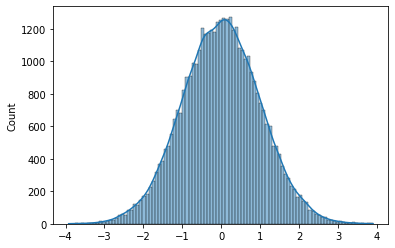

In [66]:
sns.histplot(x_n, kde=True)

In [67]:
y2_n = rg.random((40000))
x2_n = scipy.special.ndtri(y2_n)

Распределения X_N, X2_N, на одном графике:
 AxesSubplot(0.125,0.125;0.775x0.755)


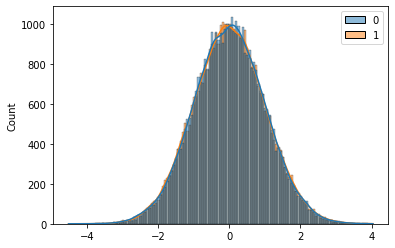

In [68]:
print('Распределения X_N, X2_N, на одном графике:\n', sns.histplot((x_n, x2_n), kde=True))

In [69]:
print('M{X_N}:', x_n.mean())
print('Sigma{X_N}:', x_n.std(), '\n')

print('M{X2_N}:', x2_n.mean())
print('Sigma{X2_N}:', x2_n.std())

M{X_N}: -0.002939565797539721
Sigma{X_N}: 1.0003739675754644 

M{X2_N}: -0.0034133405248327874
Sigma{X2_N}: 1.004522218268275
